In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ✅ Step 1: Create the data.yaml File

In [2]:
import yaml
import os

# Define paths
dataset_root = "/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL"
yaml_path = "/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/configs/data.yaml"

# Define class names (must match annotation class indices)
class_names = [
    "person", "bicycle", "car", "motorcycle", "bus", "truck",
    "traffic light", "stop sign", "chair", "bench", "bottle",
    "cup", "cell phone", "book", "handbag", "door"
]

# YAML content
data_yaml = {
    'path': dataset_root,
    'train': 'train/images',
    'val': 'val/images',
    'nc': len(class_names),
    'names': class_names
}

# ✅ Ensure directory exists
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)

# ✅ Save YAML file
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)

print(f"✅ data.yaml created at: {yaml_path}")

✅ data.yaml created at: /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/configs/data.yaml


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

### Train the Model

In [5]:
import os

train_img_dir = "/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL/train/images"
images = [f for f in os.listdir(train_img_dir) if f.endswith('.jpg')]
print(f"✅ Found {len(images)} .jpg images in train/images")
print(images[:5])  # Show sample filenames

✅ Found 65094 .jpg images in train/images
['000000110841.jpg', '000000313770.jpg', '000000502877.jpg', '000000060780.jpg', '000000272670.jpg']


In [6]:
from ultralytics import YOLO

# ✅ Load the pretrained YOLOv8m model
model = YOLO("yolov8m.pt")  # 'pt' will be auto-downloaded if not already available

# ✅ Path to your custom YAML config file
data_yaml = "/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/configs/data.yaml"

# ✅ Start training
model.train(
    data=data_yaml,
    epochs=50,                # 🔁 Sufficient for convergence; adjust if needed
    imgsz=640,                # 📏 Match your resized image dimension
    batch=64,                 # 🧠 Balance between speed and memory
    name="yolov8m_COCO_FYP", # 📂 Folder name for outputs
    project="/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs",
    pretrained=True,          # ✅ Use pretrained weights
    workers=4,                # ⚙️ For loading data faster
    augment=True              # 🎨 Enable data augmentation
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/configs/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs, name=yolov8m_COCO_FYP2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3784960  ultralytics.nn.modules.head.Detect           [16, [192, 384, 576]]         
Model summary: 169 layers, 25,865,584 parameters, 25,865,568 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDriv

train: Scanning /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL/train/labels... 65078 images, 16 backgrounds, 0 corrupt: 100%|██████████| 65094/65094 [1:04:31<00:00, 16.82it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL/train/images/000000099844.jpg: 2 duplicate labels removed


train: New cache created: /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL/val/labels... 16274 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16274/16274 [21:42<00:00, 12.49it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/datasets/processed/COCO_YOLO_FINAL/val/labels.cache
Plotting labels to /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      24.7G      2.093      2.487      1.819         56        640: 100%|██████████| 1018/1018 [07:50<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.422       0.24      0.233      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      29.4G      1.921      2.088      1.659         30        640: 100%|██████████| 1018/1018 [07:36<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313       0.37      0.195      0.174     0.0862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      29.4G      2.068      2.352      1.791         62        640: 100%|██████████| 1018/1018 [07:35<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:29<00:00,  1.43it/s]


                   all      16274      85313      0.219      0.112     0.0813      0.032

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      29.5G      2.103      2.442      1.837         72        640: 100%|██████████| 1018/1018 [07:47<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:26<00:00,  1.49it/s]


                   all      16274      85313      0.318       0.17      0.142     0.0707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      29.5G      2.005      2.284      1.772         27        640: 100%|██████████| 1018/1018 [07:45<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.387      0.198      0.179     0.0947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      29.6G      1.945      2.184      1.726         30        640: 100%|██████████| 1018/1018 [07:43<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.401      0.223      0.212      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      29.6G      1.906       2.12        1.7         52        640: 100%|██████████| 1018/1018 [07:45<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.442      0.245      0.239       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      29.6G      1.872      2.059      1.672         77        640: 100%|██████████| 1018/1018 [07:33<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:23<00:00,  1.53it/s]


                   all      16274      85313      0.447      0.266      0.257      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      29.7G       1.84      2.011      1.648         38        640: 100%|██████████| 1018/1018 [07:36<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.455      0.273      0.269      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      29.7G      1.822      1.982      1.634         20        640: 100%|██████████| 1018/1018 [07:47<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.49it/s]


                   all      16274      85313      0.465      0.286      0.285      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      29.8G      1.806       1.95      1.622         48        640: 100%|██████████| 1018/1018 [07:54<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.49it/s]


                   all      16274      85313      0.478      0.302        0.3      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      29.8G      1.793      1.918      1.606         24        640: 100%|██████████| 1018/1018 [07:48<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:26<00:00,  1.48it/s]


                   all      16274      85313      0.501      0.302      0.308      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      29.9G      1.772      1.886      1.592         33        640: 100%|██████████| 1018/1018 [07:48<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.51it/s]


                   all      16274      85313      0.506      0.312      0.317       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      29.9G      1.761      1.865      1.583         71        640: 100%|██████████| 1018/1018 [07:35<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.55it/s]


                   all      16274      85313      0.509      0.317      0.326      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      29.9G      1.747      1.846      1.573         43        640: 100%|██████████| 1018/1018 [07:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.513      0.321       0.33        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        30G       1.73      1.814      1.559         10        640: 100%|██████████| 1018/1018 [07:48<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.519      0.328      0.334      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        30G      1.721      1.801      1.555         26        640: 100%|██████████| 1018/1018 [07:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.517      0.331      0.338      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      30.1G      1.704      1.777      1.543         32        640: 100%|██████████| 1018/1018 [07:43<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:23<00:00,  1.53it/s]


                   all      16274      85313      0.522      0.335      0.341      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      30.1G        1.7      1.763      1.536         65        640: 100%|██████████| 1018/1018 [07:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.521      0.339      0.344      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      30.2G      1.686      1.746      1.525         38        640: 100%|██████████| 1018/1018 [07:33<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.55it/s]


                   all      16274      85313      0.522      0.343      0.346      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      30.2G      1.676      1.732       1.52         60        640: 100%|██████████| 1018/1018 [07:40<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:27<00:00,  1.46it/s]


                   all      16274      85313      0.524      0.346      0.349      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      30.2G      1.662      1.707      1.512         31        640: 100%|██████████| 1018/1018 [08:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:27<00:00,  1.47it/s]


                   all      16274      85313       0.53      0.348      0.352      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      30.3G      1.654      1.695      1.506         51        640: 100%|██████████| 1018/1018 [07:49<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.531      0.351      0.354      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      30.3G       1.65      1.689      1.501         95        640: 100%|██████████| 1018/1018 [07:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.537      0.353      0.357      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      30.4G      1.633      1.666      1.492         41        640: 100%|██████████| 1018/1018 [07:44<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.541      0.354       0.36      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      30.4G      1.629      1.654      1.484         61        640: 100%|██████████| 1018/1018 [07:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.55it/s]


                   all      16274      85313      0.543      0.358      0.363      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      30.5G      1.623      1.642      1.478         83        640: 100%|██████████| 1018/1018 [07:32<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.544       0.36      0.365      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      30.5G      1.614      1.631      1.473         97        640: 100%|██████████| 1018/1018 [07:47<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.548      0.362      0.367      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      30.6G        1.6      1.612      1.465         50        640: 100%|██████████| 1018/1018 [07:43<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.548      0.363       0.37       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      30.6G      1.586      1.594      1.459         29        640: 100%|██████████| 1018/1018 [07:43<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.549      0.366      0.373      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      30.6G      1.585      1.591      1.453         50        640: 100%|██████████| 1018/1018 [07:45<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.51it/s]


                   all      16274      85313      0.548      0.368      0.375      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      30.7G      1.571       1.57      1.442         24        640: 100%|██████████| 1018/1018 [07:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.54it/s]


                   all      16274      85313       0.55      0.371      0.378      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      30.7G      1.566      1.558      1.438         53        640: 100%|██████████| 1018/1018 [07:31<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.553      0.374      0.381      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      30.8G      1.552      1.539      1.428         93        640: 100%|██████████| 1018/1018 [07:45<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.556      0.375      0.384      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      30.8G      1.542      1.524      1.422         47        640: 100%|██████████| 1018/1018 [07:43<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.561      0.376      0.387      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      30.9G      1.533      1.515      1.417         64        640: 100%|██████████| 1018/1018 [07:42<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.562      0.379       0.39      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      30.9G      1.523      1.499       1.41         52        640: 100%|██████████| 1018/1018 [07:43<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.52it/s]


                   all      16274      85313      0.567      0.381      0.393      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        31G      1.513      1.483      1.402         24        640: 100%|██████████| 1018/1018 [07:39<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:23<00:00,  1.54it/s]


                   all      16274      85313       0.57      0.383      0.396       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        31G        1.5      1.464      1.393         59        640: 100%|██████████| 1018/1018 [07:39<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.50it/s]


                   all      16274      85313      0.571      0.384      0.399      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        31G      1.487      1.452      1.383         52        640: 100%|██████████| 1018/1018 [07:57<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.49it/s]


                   all      16274      85313      0.572      0.387      0.402      0.254
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      31.1G      1.502      1.371      1.396         23        640: 100%|██████████| 1018/1018 [07:34<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:26<00:00,  1.48it/s]


                   all      16274      85313      0.573       0.39      0.405      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      31.1G      1.478      1.342      1.379         16        640: 100%|██████████| 1018/1018 [07:30<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:24<00:00,  1.51it/s]


                   all      16274      85313      0.577      0.392      0.407      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      31.2G      1.464      1.321      1.367         12        640: 100%|██████████| 1018/1018 [07:31<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.50it/s]


                   all      16274      85313      0.577      0.394      0.411      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      31.2G      1.447      1.297      1.355         48        640: 100%|██████████| 1018/1018 [07:22<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.55it/s]


                   all      16274      85313      0.579      0.397      0.413      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      31.3G      1.427      1.273      1.343         57        640: 100%|██████████| 1018/1018 [07:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.55it/s]


                   all      16274      85313      0.582      0.398      0.416      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      31.3G       1.41      1.252      1.331         23        640: 100%|██████████| 1018/1018 [07:31<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.50it/s]


                   all      16274      85313      0.583        0.4      0.418      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      31.4G      1.398      1.237      1.325         38        640: 100%|██████████| 1018/1018 [07:31<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.50it/s]


                   all      16274      85313      0.587      0.401      0.421       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      31.4G       1.38      1.218      1.313         11        640: 100%|██████████| 1018/1018 [07:33<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.49it/s]


                   all      16274      85313      0.593      0.401      0.423      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      31.4G      1.369        1.2      1.302         22        640: 100%|██████████| 1018/1018 [07:29<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:25<00:00,  1.51it/s]


                   all      16274      85313      0.594      0.403      0.425      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      31.5G      1.352      1.183       1.29         43        640: 100%|██████████| 1018/1018 [07:29<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [01:22<00:00,  1.55it/s]


                   all      16274      85313      0.595      0.406      0.427      0.274

50 epochs completed in 7.624 hours.
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [02:11<00:00,  1.03s/it]


                   all      16274      85313      0.571      0.408      0.424      0.279
                person      12822      51582      0.628      0.556      0.589      0.387
               bicycle        646       1379       0.53      0.347      0.356      0.211
                   car       2536       9255      0.556      0.344      0.366      0.214
            motorcycle        680       1732       0.63      0.512      0.558      0.347
                   bus        781       1221      0.647      0.677      0.688      0.528
                 truck        788       2544      0.586      0.246      0.283      0.146
         traffic light        347        377      0.573      0.586      0.556      0.437
             stop sign       1633       4625      0.524      0.299      0.318      0.192
                 chair       1803       3991      0.551      0.372      0.388      0.259
                 bench       2461       7349      0.505      0.336      0.345      0.207
                bottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8cf0606c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

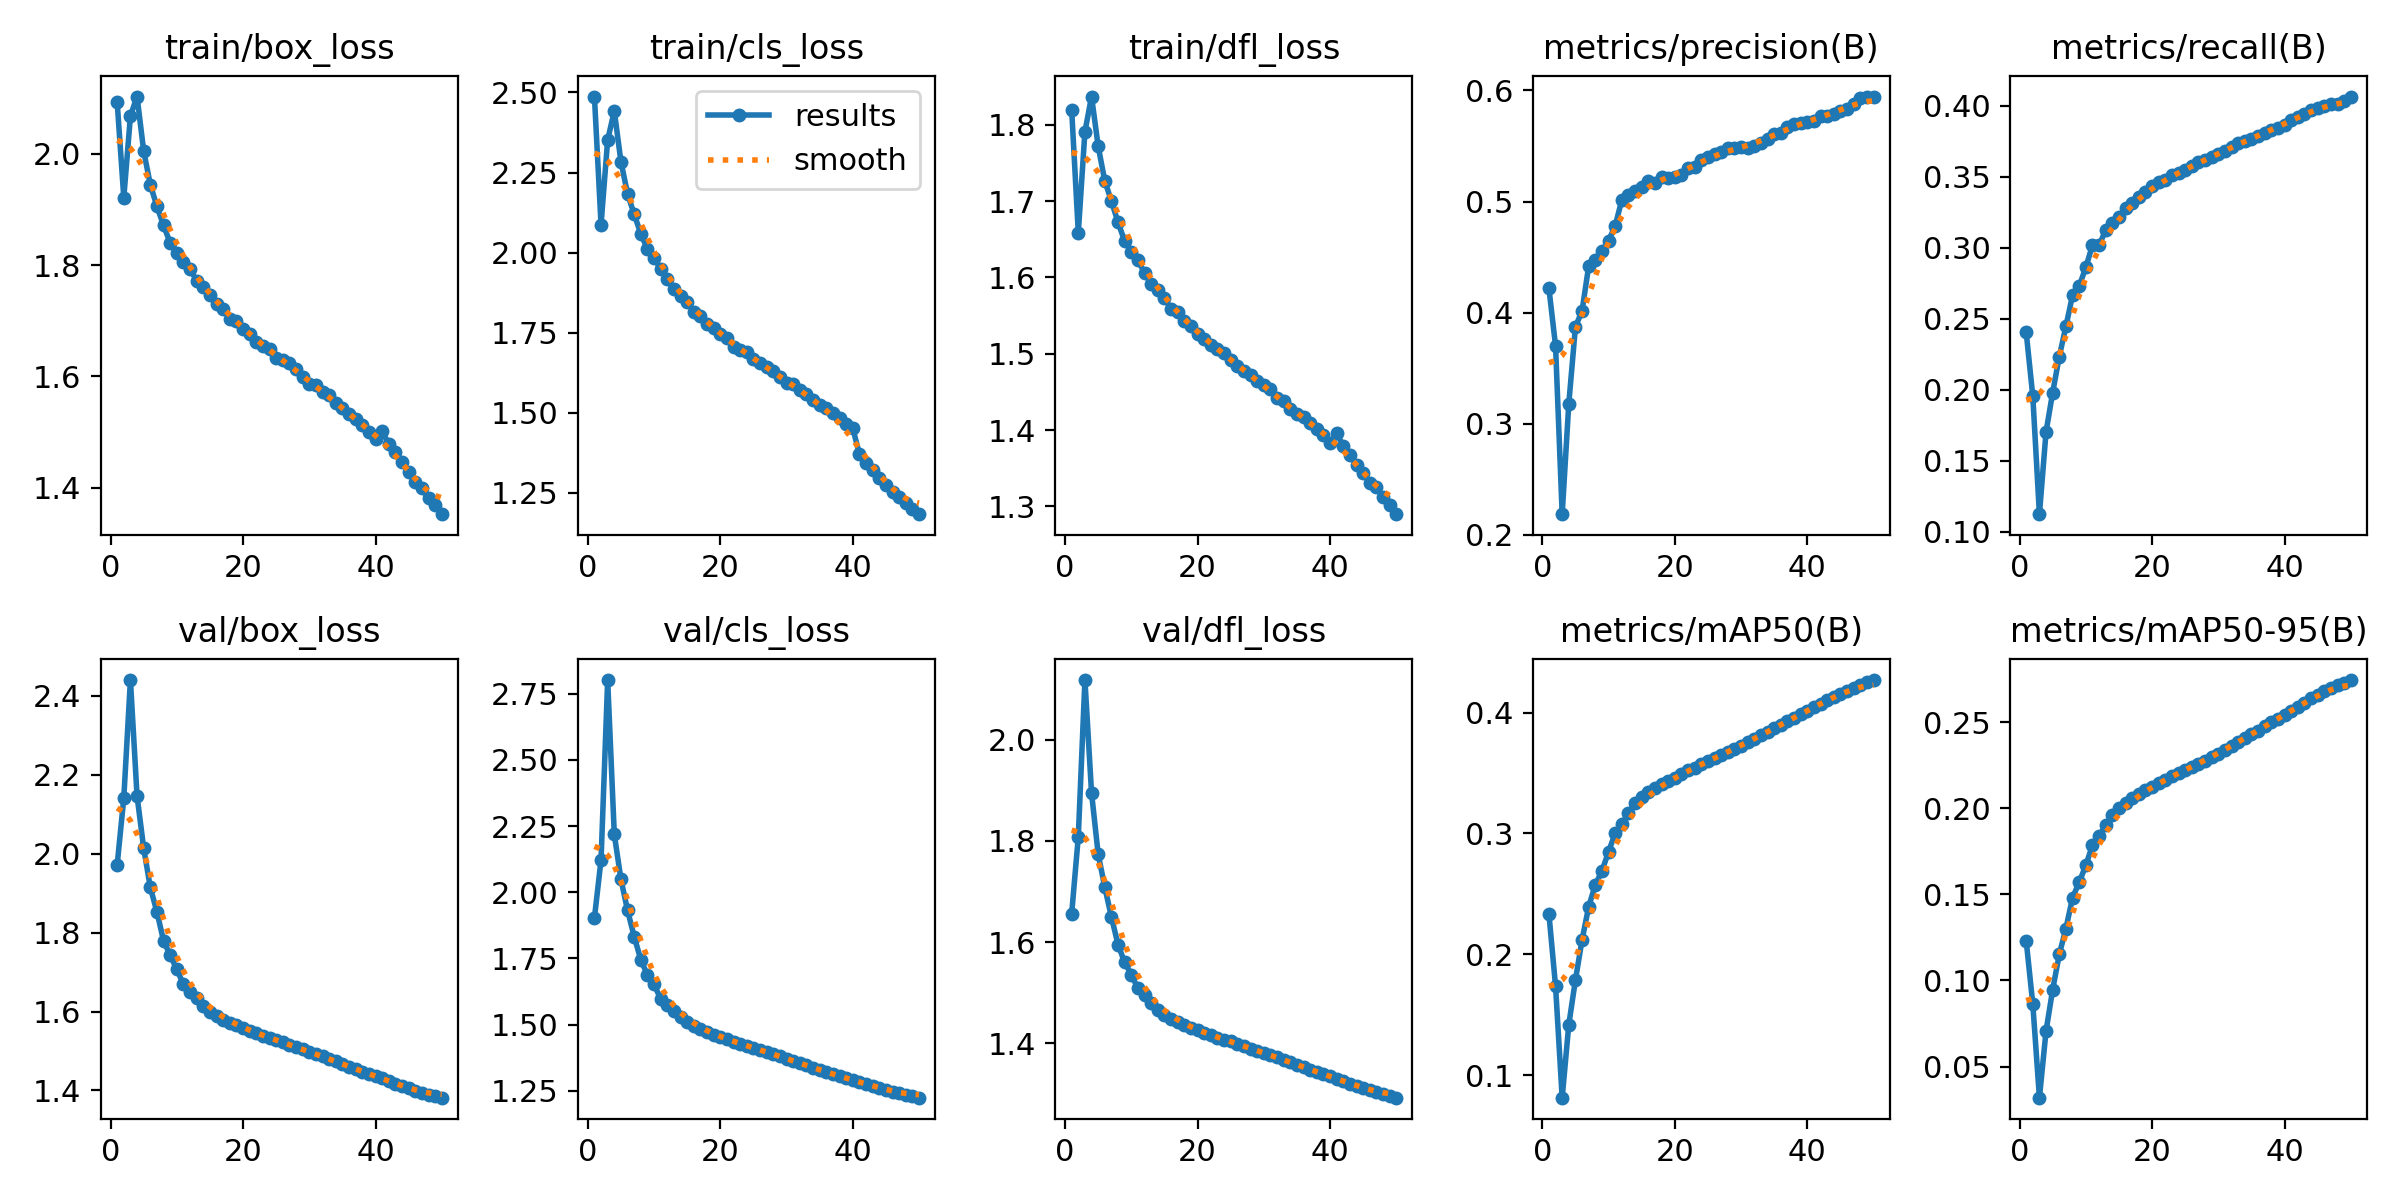

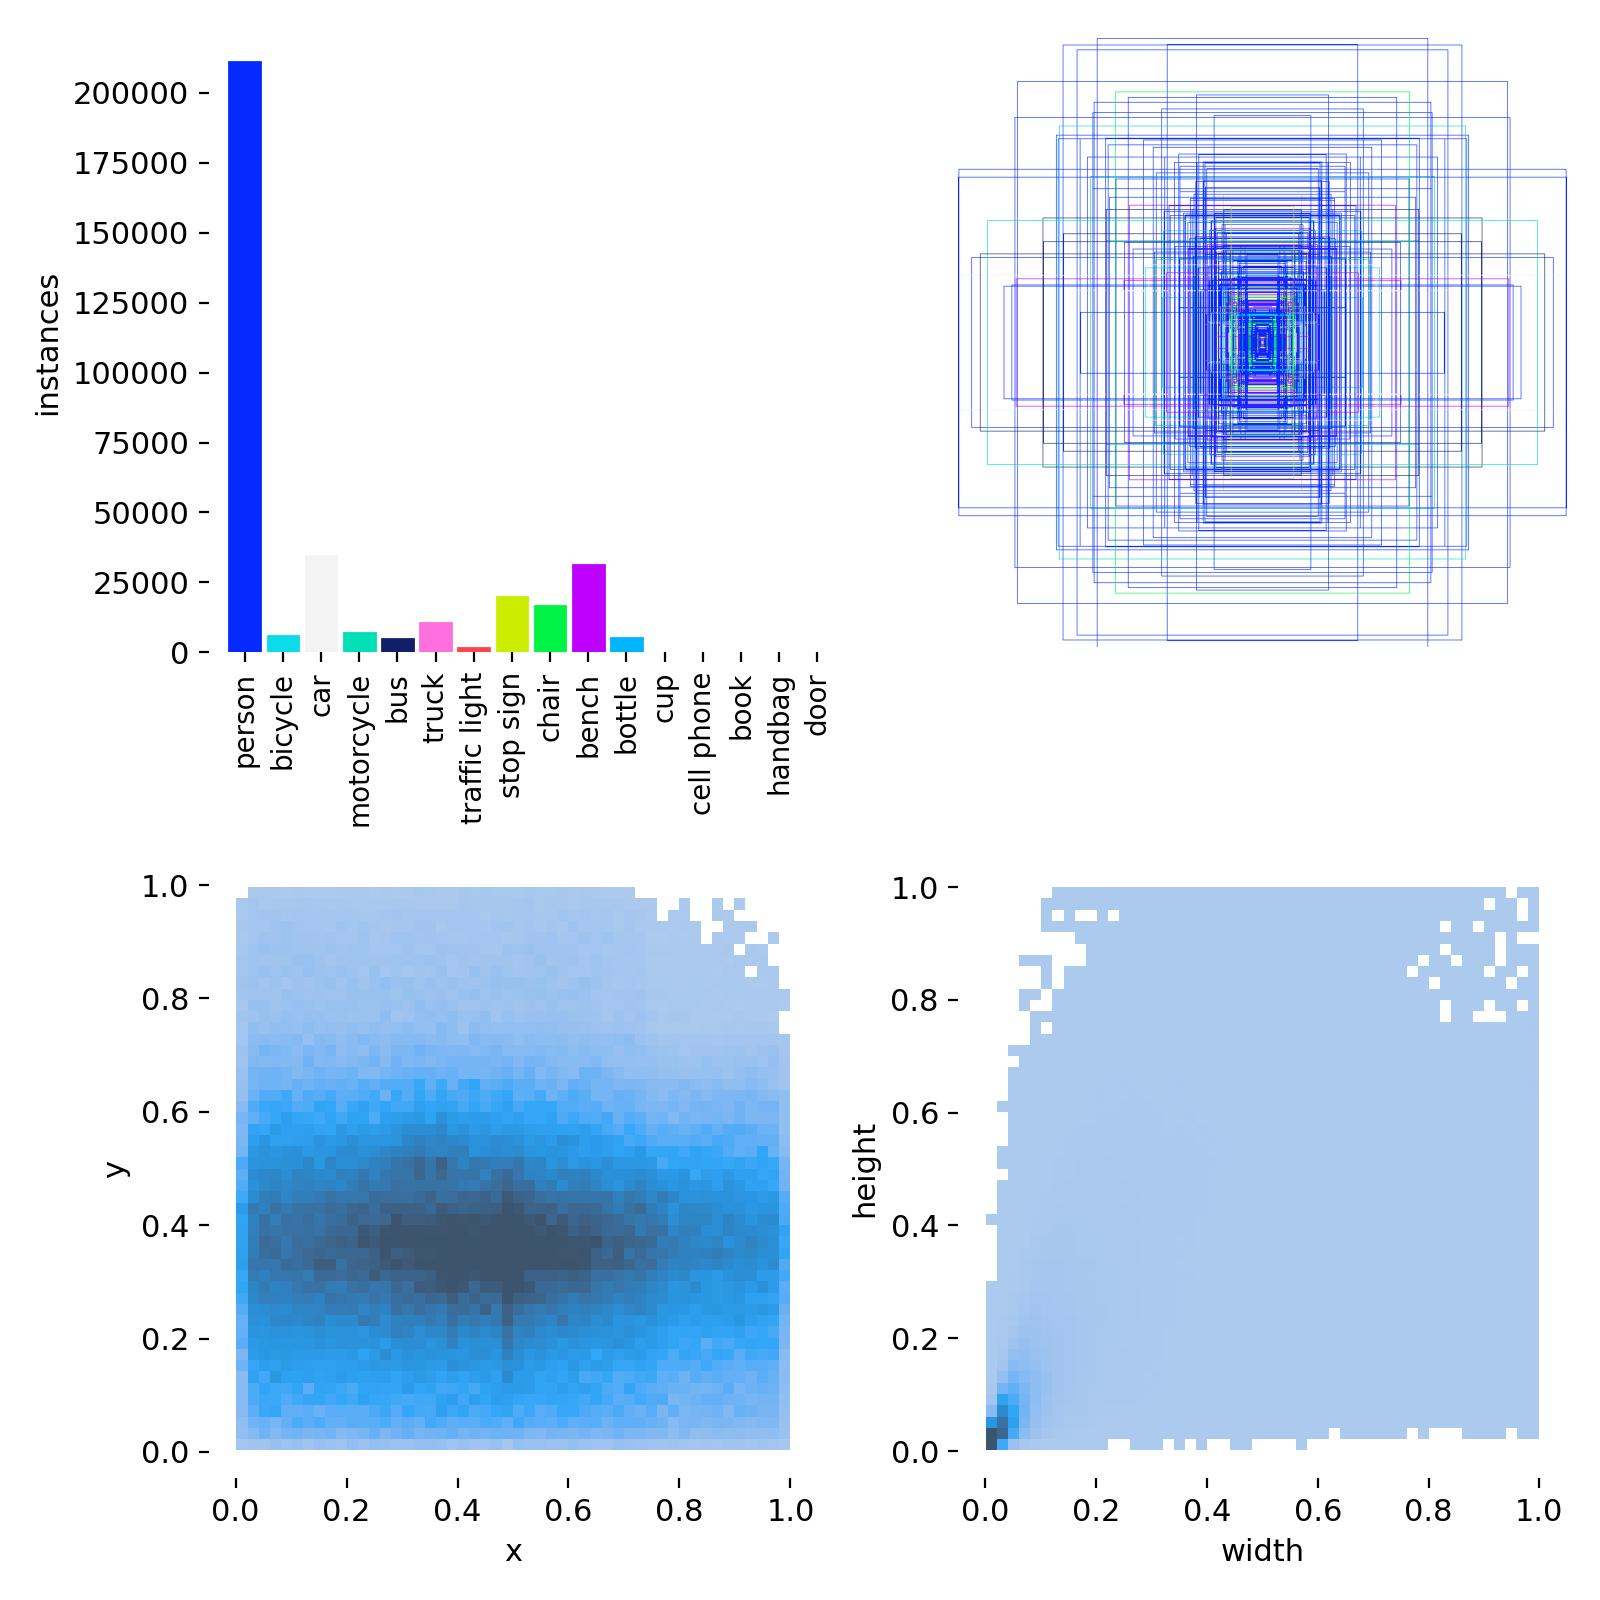

In [7]:
from IPython.display import Image, display

# Training results (losses, mAP50, mAP50-95, precision, recall)
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/results.png'))

# Label distribution
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/labels.jpg'))

In [20]:
# Show the actual column names
print(df.columns.tolist())

['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


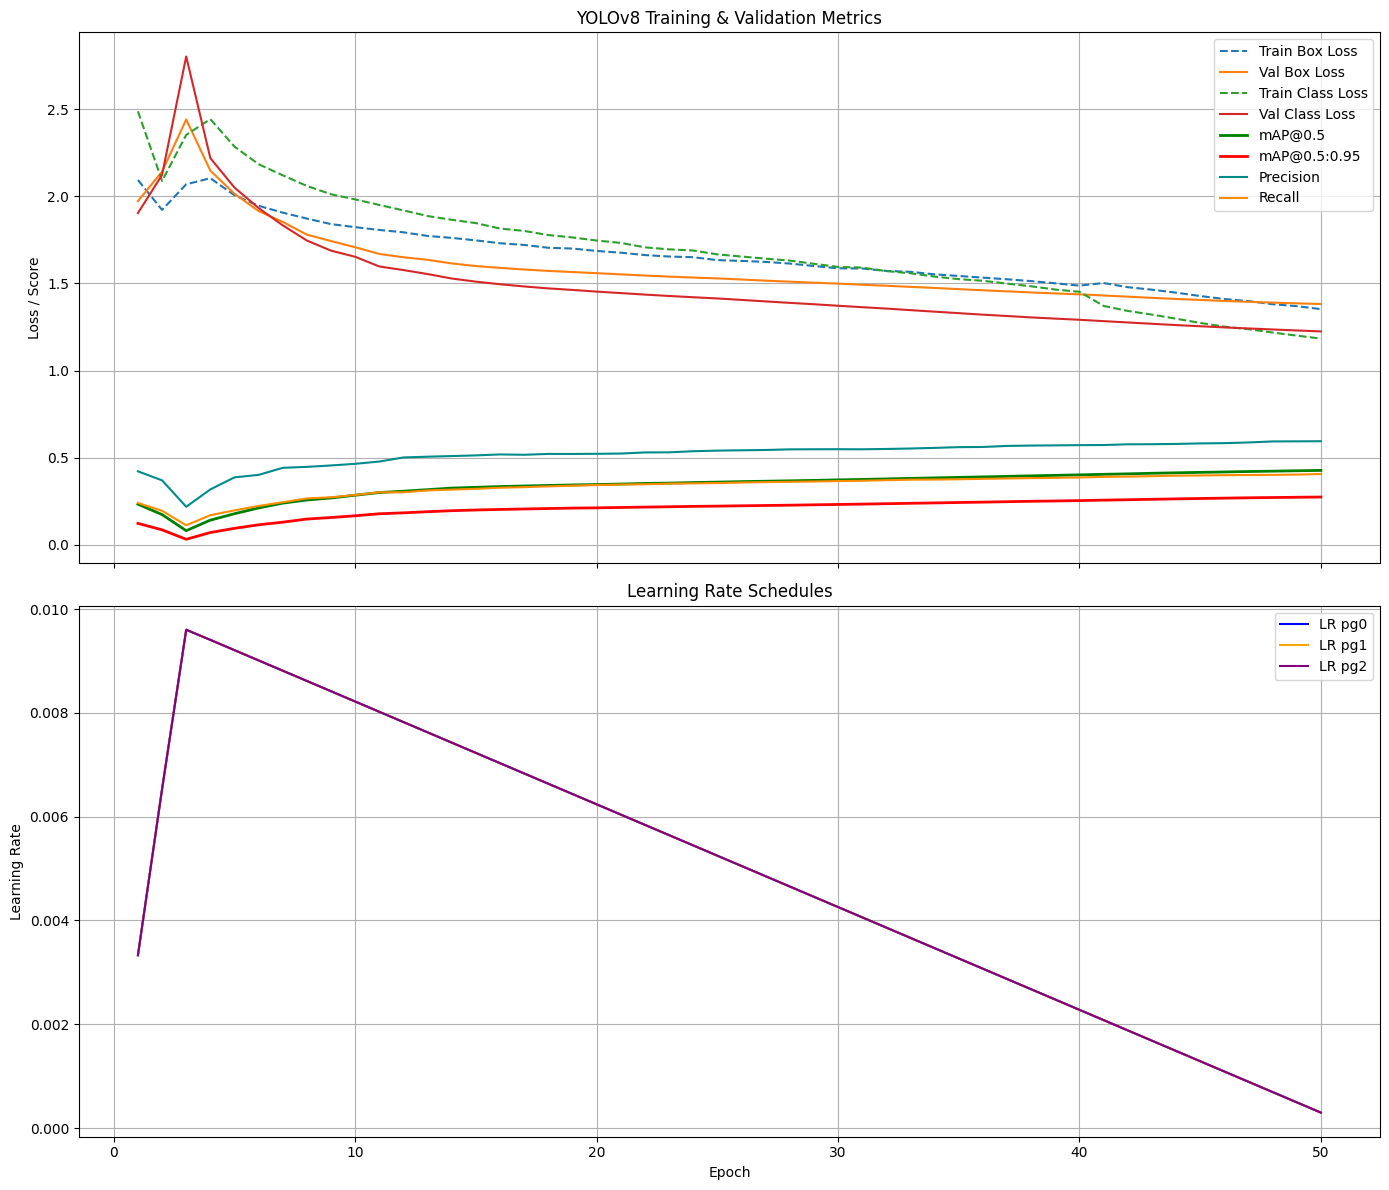

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
metrics_file = "/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/results.csv"
df = pd.read_csv(metrics_file)
df.columns = df.columns.str.strip()  # Remove any whitespace in column headers

# Set up subplots (2 rows)
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# ----------------------
# Plot 1: Losses, mAP, Precision, Recall
# ----------------------
axs[0].plot(df['epoch'], df['train/box_loss'], label="Train Box Loss", linestyle='--')
axs[0].plot(df['epoch'], df['val/box_loss'], label="Val Box Loss", linestyle='-')
axs[0].plot(df['epoch'], df['train/cls_loss'], label="Train Class Loss", linestyle='--')
axs[0].plot(df['epoch'], df['val/cls_loss'], label="Val Class Loss", linestyle='-')

axs[0].plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@0.5", color='green', linewidth=2)
axs[0].plot(df['epoch'], df['metrics/mAP50-95(B)'], label="mAP@0.5:0.95", color='red', linewidth=2)

axs[0].plot(df['epoch'], df['metrics/precision(B)'], label="Precision", color='darkcyan', linewidth=1.5)
axs[0].plot(df['epoch'], df['metrics/recall(B)'], label="Recall", color='darkorange', linewidth=1.5)

axs[0].set_ylabel("Loss / Score")
axs[0].set_title("YOLOv8 Training & Validation Metrics")
axs[0].legend(loc='upper right')
axs[0].grid(True)

# ----------------------
# Plot 2: Learning Rates
# ----------------------
axs[1].plot(df['epoch'], df['lr/pg0'], label="LR pg0", color='blue')
axs[1].plot(df['epoch'], df['lr/pg1'], label="LR pg1", color='orange')
axs[1].plot(df['epoch'], df['lr/pg2'], label="LR pg2", color='purple')

axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Learning Rate")
axs[1].set_title("Learning Rate Schedules")
axs[1].legend()
axs[1].grid(True)

# Final layout
plt.tight_layout()
plt.show()

In [26]:
model_path = "/content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/weights/best.pt"

import os
if os.path.exists(model_path):
    print("✅ Model saved successfully at:", model_path)
else:
    print("❌ Model not found at:", model_path)

✅ Model saved successfully at: /content/drive/MyDrive/Colab Notebooks/FYP_Model_NEW/outputs/yolov8m_COCO_FYP2/weights/best.pt
